In [1]:
import json
import os 
from collections import defaultdict
import pandas as pd
from tqdm import tqdm

def open_json_file(fname):
    with open(fname, 'r') as f:
        return json.load(f)
    
def save_json_file(fname, data):
    with open(fname, 'w') as f:
        json.dump(data, f, indent=4)

##### WLASL

In [2]:
data_root = os.path.join('datasets','WLASL','start_kit')
downloaded_videos = [i.split('.')[0] for i in os.listdir(os.path.join(data_root,'raw_videos'))]
labels = open_json_file(os.path.join(data_root,'WLASL_v0.3.json'))
vids_in_json = [(i['gloss'], instances['video_id']) for i in labels for instances in i['instances']]

In [3]:
len(downloaded_videos), len(vids_in_json)

(1213, 21083)

In [4]:
missing_videos_counter = defaultdict(int)
downloaded_videos_counter = defaultdict(int)
for label, vid in vids_in_json:
    if vid not in downloaded_videos:
        missing_videos_counter[label] += 1
    else:
        downloaded_videos_counter[label] += 1

In [ ]:


df_missing = pd.DataFrame(missing_videos_counter.items(), columns=['Label', 'Missing_Videos'])
df_downloaded = pd.DataFrame(downloaded_videos_counter.items(), columns=['Label', 'Downloaded_Videos'])
df = pd.merge(df_missing, df_downloaded, on='Label', how='outer').fillna(0)
df['Total_Videos'] = df.Missing_Videos + df.Downloaded_Videos

In [6]:
df.sort_values(by ='Total_Videos', ascending=False).iloc[:100]

,Label,Missing_Videos,Downloaded_Videos,Total_Videos
210,book,35,5.0,40.0
568,drink,23,12.0,35.0
392,computer,17,13.0,30.0
168,before,13,13.0,26.0
313,chair,20,6.0,26.0
...,...,...,...,...
1926,water,10,8.0,18.0
1465,right,11,7.0,18.0
1764,tell,9,9.0,18.0
1379,purple,11,7.0,18.0


In [7]:
df[df.Downloaded_Videos != 0].shape

(100, 4)

In [15]:
top_100 = set(df.sort_values(by ='Total_Videos', ascending=False).iloc[:100].Label.to_list())
top_100

{'accident',
 'all',
 'apple',
 'basketball',
 'bed',
 'before',
 'bird',
 'black',
 'blue',
 'book',
 'bowling',
 'brown',
 'but',
 'can',
 'candy',
 'chair',
 'change',
 'cheat',
 'city',
 'clothes',
 'color',
 'computer',
 'cook',
 'cool',
 'corn',
 'cousin',
 'cow',
 'dance',
 'dark',
 'deaf',
 'decide',
 'doctor',
 'dog',
 'drink',
 'eat',
 'enjoy',
 'family',
 'fine',
 'finish',
 'fish',
 'forget',
 'full',
 'give',
 'go',
 'graduate',
 'hat',
 'hearing',
 'help',
 'hot',
 'how',
 'jacket',
 'kiss',
 'language',
 'last',
 'later',
 'letter',
 'like',
 'man',
 'many',
 'medicine',
 'meet',
 'mother',
 'need',
 'no',
 'now',
 'orange',
 'paint',
 'pink',
 'pizza',
 'play',
 'pull',
 'purple',
 'right',
 'same',
 'school',
 'secretary',
 'shirt',
 'short',
 'son',
 'study',
 'table',
 'tall',
 'tell',
 'thanksgiving',
 'thin',
 'time',
 'visit',
 'wait',
 'walk',
 'want',
 'water',
 'what',
 'white',
 'who',
 'wife',
 'woman',
 'work',
 'wrong',
 'year',
 'yes'}

In [17]:
save_json_file(os.path.join(data_root, 'top_100.json'), list(top_100))

In [19]:
json.load(open(os.path.join(data_root,'top_100.json'), 'r'))[0]

'bird'

In [20]:
a = ['bird', 'sadasdasdd']

for i in a:
    if i not in top_100:
        continue
    print(i)

bird


##### MSASL

In [3]:
dataset_root = os.path.join('datasets', 'MS-ASL')
fname = os.path.join(dataset_root, 'MSASL_train.json')
df = pd.read_json(fname, orient='records')
df.head()

,org_text,clean_text,start_time,signer_id,signer,start,end,file,label,height,fps,end_time,url,text,box,width,review
0,match [light-a-MATCH],match,0.0,0,0,0,83,match light-a-MATCH,830,360,30.00,2.767,https://www.youtube.com/watch?v=C37R_Ix8-qs,match,"[0.057544618844985004, 0.21637457609176602, 1....",640,NaN
1,FAIL,fail,0.0,0,-1,0,74,FAIL,542,360,25.00,2.960,https://www.youtube.com/watch?v=PIsUJl8BN_I,fail,"[0.06577941775321901, 0.167171776294708, 0.939...",480,NaN
2,laugh,laugh,0.0,4,26,0,31,SignSchool Laugh with Legs 2,312,360,29.97,1.034,www.youtube.com/watch?v=9FdHlMOnVjg,laugh,"[0.131885945796966, 0.32334136962890603, 1.0, ...",640,NaN
3,BOOK,book,0.0,0,-1,0,66,BOOK(3),38,360,25.00,2.640,https://www.youtube.com/watch?v=J7tP98oDxqE,book,"[0.055698871612548, 0.25173279643058705, 0.996...",480,NaN
4,sign-language,sign language,0.0,0,-1,0,75,SIGN-LANGUAGE-S-CLAW-F,848,360,29.97,2.502,www.youtube.com/watch?v=N2mG9ZKjrGA,sign language,"[0.039043992757797005, 0.24198183417320202, 1....",640,NaN


In [4]:
df.shape

(16054, 17)

In [5]:
df.groupby('clean_text').size().reset_index(name='counts').sort_values(by='counts', ascending=False).head(10)

,clean_text,counts
285,eat,57
642,nice,54
995,want,53
675,orange,50
922,teacher,50
1012,what,48
1017,white,48
373,friend,48
551,like,48
347,fish,47


In [6]:
from pytube import YouTube
from pytube.exceptions import VideoUnavailable

def is_valid_youtube_link(url):
    try:
        yt = YouTube(url)
        yt.check_availability()
        return True
    except VideoUnavailable:
        return False
    except Exception as e:
        print(f"An unexpected error occurred: {e}")
        return False
    
def count_valid_links_by_label(df, label, label_column='clean_text', url_column='url'):
    valid_links_counter = 0 
    invalid_links_counter = 0
    for _, row in tqdm(df[df[label_column] == label].iterrows(), desc="Counting Valid Links"):
        url = row[url_column]
        if is_valid_youtube_link(url):
            valid_links_counter += 1
        else:
            invalid_links_counter += 1
    return valid_links_counter, invalid_links_counter

In [7]:
top_10_signs = df.groupby('clean_text').size().reset_index(name='counts').sort_values(by='counts', ascending=False).head(10)
top_10_signs

,clean_text,counts
285,eat,57
642,nice,54
995,want,53
675,orange,50
922,teacher,50
1012,what,48
1017,white,48
373,friend,48
551,like,48
347,fish,47


In [ ]:
# available_links = []
# for sign in top_10_signs.clean_text.to_list():
#     valid_links, _ = count_valid_links_by_label(df, sign)
#     available_links.append(valid_links)

# top_10_signs['Available_links'] = available_links

In [ ]:
# top_10_signs.sort_values(by='Available_links', ascending=False)

,clean_text,counts,Available_links
285,eat,57,43
347,fish,47,42
642,nice,54,39
995,want,53,38
922,teacher,50,37
675,orange,50,36
373,friend,48,36
1017,white,48,35
1012,what,48,34
551,like,48,34


In [8]:
import yt_dlp

def download_video_yt_dlp(url, output_path, filename):
    ydl_opts = {
        'format': 'bestvideo',  # get best quality available
        'outtmpl': f'{output_path}/{filename}.mp4',
        'merge_output_format': 'mp4',  # ensure merging audio/video into mp4
        'quiet': True  # suppress logging if you want
    }

    with yt_dlp.YoutubeDL(ydl_opts) as ydl:
        ydl.download([url])

# Downloads video based on the specified Label.
# Returns a List of Video IDs where Video is Invalid if its ID is -1. 
def download_videos(df, label, label_column='clean_text', url_column='url', output_dir_root='videos', vids = []):
    if not os.path.exists(output_dir_root):
        os.makedirs(output_dir_root)
    
    for _, row in df[df[label_column] == label].iterrows():
        url = row[url_column]
        try:
            if not is_valid_youtube_link(url):
                vids.append('-1')
                print(f'Invalid URL: {url}')
                continue
            output_dir = os.path.join(output_dir_root, label)
            if not os.path.exists(output_dir):
                os.makedirs(output_dir)

            yt = YouTube(url)
            fname = yt.video_id
            
            if f'{fname}.mp4' in vids or f'{fname}.mp4' in os.listdir(output_dir):
                print(f"Already downloaded: {fname}.mp4")
                vids.append(fname)
                continue

            download_video_yt_dlp(url, output_dir, fname)
            vids.append((url, fname))
            print(f"Downloaded: {label} from {url}")
        except Exception as e:
            print(f"Failed to download {label} from {url}: {e}")
    return vids


def get_vids_from_dir(vid_path, label):
    vdir = os.path.join(vid_path, label)
    return [i.split('.')[0] for i in os.listdir(vdir)] if os.path.exists(vdir) else []



# stream = yt.streams.filter(progressive=True, file_extension='mp4').order_by('resolution').desc().first()
# vids.append(fname)
# if stream is None:
#     print(f"No suitable stream found for {url}")
#     continue

# stream.download(output_path=output_dir, filename=f"{fname}.mp4")

In [ ]:
assert False, 'Do not Run this cell, unless you want to download the videos. commen this line to run it.'
label_with_ids = dict()
for label in top_10_signs.clean_text.to_list():
    save_vid_path = os.path.join('datasets', 'MS-ASL', 'videos')
    ovids = get_vids_from_dir(save_vid_path, label)
    print(f" {label} ".center(60, '='))
    vids = download_videos(df, label, output_dir_root=save_vid_path, vids=ovids)
    label_with_ids[label] = vids
    print()

=========================== eat ============================
Downloaded: eat from https://www.youtube.com/watch?v=htsdwxJ-fTo
Downloaded: eat from https://www.youtube.com/watch?v=DGFSZB6BLLc
Downloaded: eat from https://www.youtube.com/watch?v=mC0lNJ6iz-s
Already downloaded: mC0lNJ6iz-s.mp4
Already downloaded: mC0lNJ6iz-s.mp4
Already downloaded: mC0lNJ6iz-s.mp4
Downloaded: eat from https://www.youtube.com/watch?v=ga_qPj5JN9c
Downloaded: eat from https://www.youtube.com/watch?v=E4LtjQ3gUO0
Downloaded: eat from https://www.youtube.com/watch?v=sErq0TJMKEo
Invalid URL: https://www.youtube.com/watch?v=73icFhednQU
Downloaded: eat from https://www.youtube.com/watch?v=my4mxg6lXYQ


Downloaded: eat from https://www.youtube.com/watch?v=CDvezLz5yVM
Invalid URL: https://www.youtube.com/watch?v=3rurYLE33MI
Invalid URL: https://www.youtube.com/watch?v=QxOYnMWCVhM&t=4s
Downloaded: eat from https://www.youtube.com/watch?v=vE4RFGPqGqY
Downloaded: eat from https://www.youtube.com/watch?v=6UrcyZ-QeiU
Already downloaded: 6UrcyZ-QeiU.mp4
Already downloaded: 6UrcyZ-QeiU.mp4
Downloaded: eat from https://www.youtube.com/watch?v=5S3qaGLdPmE
Downloaded: eat from https://www.youtube.com/watch?v=Xt6F1wT394I
Downloaded: eat from https://www.youtube.com/watch?v=jDCw7stJaM4
Downloaded: eat from https://www.youtube.com/watch?v=jzemBg_G8zU
Downloaded: eat from https://www.youtube.com/watch?v=mpvWKGLbGW4
Downloaded: eat from https://www.youtube.com/watch?v=2nXrJ_7NOgE
Invalid URL: www.youtube.com/watch?v=rbnYbQyFvK4
Downloaded: eat from https://www.youtube.com/watch?v=qAF88xW4xPY
Downloaded: eat from https://www.youtube.com/watch?v=Gs9zBeSIVIE
Downloaded: eat from https://www.youtube.com/

Downloaded: eat from www.youtube.com/watch?v=9AYysHe14jg 
Downloaded: eat from https://www.youtube.com/watch?v=thdb-I-H9kE
Downloaded: eat from https://www.youtube.com/watch?v=OmylSinUxns
Downloaded: eat from https://www.youtube.com/watch?v=q_p38s5JsXo
Already downloaded: q_p38s5JsXo.mp4
Invalid URL: https://www.youtube.com/watch?v=2LX7wfTYW3o
Invalid URL: https://www.youtube.com/watch?v=2LX7wfTYW3o
Invalid URL: https://www.youtube.com/watch?v=TPmpYP8l888&t=528s
Invalid URL: https://www.youtube.com/watch?v=TPmpYP8l888&t=528s

=========================== nice ===========================
Invalid URL: https://www.youtube.com/watch?v=7YYB3BEoksc
Invalid URL: https://www.youtube.com/watch?v=7YYB3BEoksc
Invalid URL: https://www.youtube.com/watch?v=7YYB3BEoksc
Invalid URL: https://www.youtube.com/watch?v=7YYB3BEoksc
Downloaded: nice from https://www.youtube.com/watch?v=mC0lNJ6iz-s
Downloaded: nice from https://www.youtube.com/watch?v=RWYus9H4YrQ
Already downloaded: RWYus9H4YrQ.mp4


Downloaded: nice from www.youtube.com/watch?v=3aXS3keR8oY
Downloaded: nice from https://www.youtube.com/watch?v=sErq0TJMKEo
Downloaded: nice from https://www.youtube.com/watch?v=y3Vd7SZ_bp4
Already downloaded: y3Vd7SZ_bp4.mp4
Already downloaded: y3Vd7SZ_bp4.mp4
Downloaded: nice from https://www.youtube.com/watch?v=QTbj2GM5ohs
Downloaded: nice from https://www.youtube.com/watch?v=LPyvlWpL-xk
Already downloaded: LPyvlWpL-xk.mp4
Invalid URL: https://www.youtube.com/watch?v=xfVNJxKWqeg
Invalid URL: https://www.youtube.com/watch?v=TUQUVlMupcs
Downloaded: nice from https://www.youtube.com/watch?v=u0XAd3TkGaA
Already downloaded: u0XAd3TkGaA.mp4
Downloaded: nice from https://www.youtube.com/watch?v=xO0FZwvScOI
Downloaded: nice from https://www.youtube.com/watch?v=NOZSXL8Z_Q4
Downloaded: nice from https://www.youtube.com/watch?v=p67ss5Yhjbk
Invalid URL: www.youtube.com/watch?v=i7-IftrdNRs
Downloaded: nice from https://www.youtube.com/watch?v=2PeTh4Ym048
Downloaded: nice from https://www.youtube

Downloaded: orange from www.youtube.com/watch?v=V3hT7-PIJz4
Downloaded: orange from https://www.youtube.com/watch?v=mCjHYreiZ24
Invalid URL: https://www.youtube.com/watch?v=QxOYnMWCVhM&t=4s
Downloaded: orange from https://www.youtube.com/watch?v=vE4RFGPqGqY
Downloaded: orange from https://www.youtube.com/watch?v=WuwIz-vDMUc
Invalid URL: https://www.youtube.com/watch?v=TnJQtTYVTtg&t=242s
Downloaded: orange from https://www.youtube.com/watch?v=pc0-gVEETVg
Downloaded: orange from https://www.youtube.com/watch?v=4iWzK-kKmIU
Already downloaded: 4iWzK-kKmIU.mp4
Invalid URL: https://www.youtube.com/watch?v=dbzKXsyAcvY
Downloaded: orange from https://www.youtube.com/watch?v=kyLNqzXq8IA
Downloaded: orange from https://www.youtube.com/watch?v=WprUBqi3iBc
Invalid URL: www.youtube.com/watch?v=eIPe2WLrJtY
Downloaded: orange from https://www.youtube.com/watch?v=p8OYydc3WQM
Downloaded: orange from https://www.youtube.com/watch?v=5Sb-YjNphkY


Downloaded: orange from www.youtube.com/watch?v=Wt4p6qWgR1k
Downloaded: orange from https://www.youtube.com/watch?v=Zjg2IfknuHE
Downloaded: orange from https://www.youtube.com/watch?v=NAZKMt2NhtU
Already downloaded: NAZKMt2NhtU.mp4
Invalid URL: https://www.youtube.com/watch?v=1RjPFNyJ4Tw
Downloaded: orange from https://www.youtube.com/watch?v=ptIbdZNuwR0
Invalid URL: https://www.youtube.com/watch?v=g0-WX7prrxo
Invalid URL: https://www.youtube.com/watch?v=oDnz2t98VYk
Downloaded: orange from https://www.youtube.com/watch?v=P_VWeMzjoEY
Downloaded: orange from https://www.youtube.com/watch?v=W_IPtdsIUOo
Downloaded: orange from https://www.youtube.com/watch?v=mBfWiymT0N8
Downloaded: orange from https://www.youtube.com/watch?v=JHFExZgYdwk&t=4s
Downloaded: orange from https://www.youtube.com/watch?v=B2MuRVFAn6w
Already downloaded: B2MuRVFAn6w.mp4
Downloaded: orange from https://www.youtube.com/watch?v=9RE2NLd_Sgw
Downloaded: orange from https://www.youtube.com/watch?v=02NAI-ykpWk
Downloaded: 

Downloaded: orange from www.youtube.com/watch?v=K1EAxRE0ZaM
Invalid URL: https://www.youtube.com/watch?v=zUym5LrN7_I
Invalid URL: https://www.youtube.com/watch?v=zUym5LrN7_I
Downloaded: orange from https://www.youtube.com/watch?v=fNg_sJ9f8EI

========================= teacher ==========================
Downloaded: teacher from https://www.youtube.com/watch?v=_HOx2QkkTsg
Already downloaded: _HOx2QkkTsg.mp4


Downloaded: teacher from https://www.youtube.com/watch?v=cqyB9f32GuI


Downloaded: teacher from www.youtube.com/watch?v=_NqL43yWhUk
Invalid URL: https://www.youtube.com/watch?v=73icFhednQU


Downloaded: teacher from www.youtube.com/watch?v=hJZhwVjk-eo
Downloaded: teacher from https://www.youtube.com/watch?v=my4mxg6lXYQ
Invalid URL: https://www.youtube.com/watch?v=xfVNJxKWqeg
Invalid URL: https://www.youtube.com/watch?v=xfVNJxKWqeg
Invalid URL: https://www.youtube.com/watch?v=xfVNJxKWqeg
Downloaded: teacher from https://www.youtube.com/watch?v=mfrGIHTnKvI
Downloaded: teacher from https://www.youtube.com/watch?v=f7COHRpmVKA
Invalid URL: https://www.youtube.com/watch?v=Zh9LNvbksnI
Invalid URL: https://www.youtube.com/watch?v=Zh9LNvbksnI
Downloaded: teacher from https://www.youtube.com/watch?v=xu9VvX1Vbck
Downloaded: teacher from https://www.youtube.com/watch?v=NOZSXL8Z_Q4
Downloaded: teacher from https://www.youtube.com/watch?v=K4lo0NZDlH8


Downloaded: teacher from https://www.youtube.com/watch?v=wm-dxopEZT8
Invalid URL: https://www.youtube.com/watch?v=cdl5N710d28
Invalid URL: https://www.youtube.com/watch?v=cdl5N710d28
Invalid URL: https://www.youtube.com/watch?v=TnJQtTYVTtg&t=242s
Invalid URL: https://www.youtube.com/watch?v=dbzKXsyAcvY
Downloaded: teacher from https://www.youtube.com/watch?v=-LB4ENHxcIs
Downloaded: teacher from https://www.youtube.com/watch?v=HYK7P7Cm_aY
Already downloaded: HYK7P7Cm_aY.mp4
Already downloaded: HYK7P7Cm_aY.mp4
Downloaded: teacher from https://www.youtube.com/watch?v=UKGBW9-wo4k
Downloaded: teacher from https://www.youtube.com/watch?v=p8OYydc3WQM
Downloaded: teacher from https://www.youtube.com/watch?v=DOZJOFHs75s
Downloaded: teacher from https://www.youtube.com/watch?v=vcrTUbE1NoY
Downloaded: teacher from https://www.youtube.com/watch?v=nBvBJ91I5ZI
Already downloaded: nBvBJ91I5ZI.mp4
Downloaded: teacher from https://www.youtube.com/watch?v=AkGYEiN8vOY
Already downloaded: AkGYEiN8vOY.mp4


Downloaded: teacher from www.youtube.com/watch?v=-DZaI_yoNac

=========================== what ===========================
Invalid URL: https://www.youtube.com/watch?v=PpeviLqqBtk
Invalid URL: https://www.youtube.com/watch?v=PpeviLqqBtk
Invalid URL: https://www.youtube.com/watch?v=7YYB3BEoksc
Downloaded: what from https://www.youtube.com/watch?v=sErq0TJMKEo
Invalid URL: https://www.youtube.com/watch?v=eXpXg4q-qEQ&t=170s
Downloaded: what from https://www.youtube.com/watch?v=my4mxg6lXYQ
Downloaded: what from https://www.youtube.com/watch?v=X7z-Z1kJwp4
Already downloaded: X7z-Z1kJwp4.mp4
Already downloaded: X7z-Z1kJwp4.mp4
Already downloaded: X7z-Z1kJwp4.mp4
Downloaded: what from https://www.youtube.com/watch?v=z8e_-viWx9E
Downloaded: what from https://www.youtube.com/watch?v=aeZKNdfmbPo
Already downloaded: aeZKNdfmbPo.mp4


Downloaded: what from www.youtube.com/watch?v=1udGGPLkA-Q
Invalid URL: https://www.youtube.com/watch?v=uPWzbFvXcuw
Downloaded: what from https://www.youtube.com/watch?v=p36hZJQpLoQ
Invalid URL: https://www.youtube.com/watch?v=TnJQtTYVTtg&t=242s
Invalid URL: https://www.youtube.com/watch?v=dbzKXsyAcvY
Downloaded: what from https://www.youtube.com/watch?v=eMZdggjnLQA
Downloaded: what from https://www.youtube.com/watch?v=-LB4ENHxcIs
Invalid URL: https://www.youtube.com/watch?v=iMUjcZCLaGo
Downloaded: what from https://www.youtube.com/watch?v=rWIDL_GpaJc&t=3s
Downloaded: what from https://www.youtube.com/watch?v=MDQQ9WZNwcc
Downloaded: what from https://www.youtube.com/watch?v=qk58RD7dz_k
Already downloaded: qk58RD7dz_k.mp4
Invalid URL: https://www.youtube.com/watch?v=wRoGQu75wzw
Invalid URL: https://www.youtube.com/watch?v=wRoGQu75wzw
Invalid URL: www.youtube.com/watch?v=0v4R-uMJZTc
Downloaded: what from https://www.youtube.com/watch?v=DOZJOFHs75s
Invalid URL: www.youtube.com/watch?v=wOLH

Downloaded: what from https://www.youtube.com/watch?v=ZvPcSJ9A1pM
Invalid URL: www.youtube.com/watch?v=M1gXuGSWqVI
Downloaded: what from https://www.youtube.com/watch?v=9RE2NLd_Sgw
Downloaded: what from https://www.youtube.com/watch?v=WxY7E9P46DM
Downloaded: what from https://www.youtube.com/watch?v=R_ES8RZua1g
Downloaded: what from https://www.youtube.com/watch?v=UoITyyziLOw
Downloaded: what from https://www.youtube.com/watch?v=fNg_sJ9f8EI

========================== white ===========================
Downloaded: white from https://www.youtube.com/watch?v=K8c-np9zNT8
Already downloaded: K8c-np9zNT8.mp4
Invalid URL: www.youtube.com/watch?v=0FYsztUQnUM


Downloaded: white from www.youtube.com/watch?v=v8h6mw4zGys
Downloaded: white from https://www.youtube.com/watch?v=uLjkLwFvFtw
Invalid URL: https://www.youtube.com/watch?v=7YYB3BEoksc
Invalid URL: https://www.youtube.com/watch?v=7YYB3BEoksc
Invalid URL: https://www.youtube.com/watch?v=7YYB3BEoksc
Invalid URL: https://www.youtube.com/watch?v=7YYB3BEoksc
Invalid URL: https://www.youtube.com/watch?v=7YYB3BEoksc
Downloaded: white from https://www.youtube.com/watch?v=L-Pqbf0SSBk
Already downloaded: L-Pqbf0SSBk.mp4
Already downloaded: L-Pqbf0SSBk.mp4
Already downloaded: L-Pqbf0SSBk.mp4
Downloaded: white from https://www.youtube.com/watch?v=QTbj2GM5ohs
Downloaded: white from https://www.youtube.com/watch?v=MZboKry8fo0
Downloaded: white from https://www.youtube.com/watch?v=mfrGIHTnKvI
Invalid URL: https://www.youtube.com/watch?v=Kh8PEWtOZ6k
Invalid URL: https://www.youtube.com/watch?v=Kh8PEWtOZ6k
Downloaded: white from https://www.youtube.com/watch?v=D0Aq3IzYnUU
Already downloaded: D0Aq3IzYnUU.

Downloaded: white from www.youtube.com/watch?v=O6-OsGXF0Uw
Downloaded: white from https://www.youtube.com/watch?v=TomJbyh-XVY
Downloaded: white from https://www.youtube.com/watch?v=W_IPtdsIUOo
Downloaded: white from https://www.youtube.com/watch?v=JHFExZgYdwk&t=4s
Downloaded: white from https://www.youtube.com/watch?v=9RE2NLd_Sgw
Invalid URL: https://www.youtube.com/watch?v=uGyCr26CN44
Downloaded: white from https://www.youtube.com/watch?v=mCG3gsQfiBA
Downloaded: white from https://www.youtube.com/watch?v=EEETudiKe50
Downloaded: white from https://www.youtube.com/watch?v=fNg_sJ9f8EI

========================== friend ==========================
Invalid URL: https://www.youtube.com/watch?v=7YYB3BEoksc
Downloaded: friend from https://www.youtube.com/watch?v=bq-HmgjGzmw
Invalid URL: https://www.youtube.com/watch?v=D7UYn37qTkU
Downloaded: friend from https://www.youtube.com/watch?v=hLF-XX4op04
Downloaded: friend from https://www.youtube.com/watch?v=aMtB6wxdKg8
Invalid URL: www.youtube.com/w

Downloaded: friend from https://www.youtube.com/watch?v=csBb71UPN8E
Invalid URL: https://www.youtube.com/watch?v=25OsRZMSydI
Invalid URL: https://www.youtube.com/watch?v=iMUjcZCLaGo
Downloaded: friend from https://www.youtube.com/watch?v=yzl_Ez0ZB9Q
Invalid URL: https://www.youtube.com/watch?v=ElL1zlHxo-0
Downloaded: friend from https://www.youtube.com/watch?v=12Cqpj9g96Q
Invalid URL: www.youtube.com/watch?v=ZrGbJG6okbk
Downloaded: friend from https://www.youtube.com/watch?v=YasOpK1RNvg
Already downloaded: YasOpK1RNvg.mp4
Downloaded: friend from https://www.youtube.com/watch?v=nBvBJ91I5ZI
Already downloaded: nBvBJ91I5ZI.mp4
Invalid URL: https://www.youtube.com/watch?v=OY1KL0vbBIo&t=135s
Downloaded: friend from https://www.youtube.com/watch?v=pv1yeA4iHmU
Already downloaded: pv1yeA4iHmU.mp4
Invalid URL: https://www.youtube.com/watch?v=SdAhWTmIZ3I
Invalid URL: https://www.youtube.com/watch?v=SdAhWTmIZ3I
Downloaded: friend from https://www.youtube.com/watch?v=cF6XScPZDsE
Downloaded: friend

Downloaded: friend from www.youtube.com/watch?v=6RRmIyhkMx0
Invalid URL: https://www.youtube.com/watch?v=0Bj00OLMsjQ

=========================== like ===========================
Invalid URL: www.youtube.com/watch?v=7y5Ye-2-ZBs
Downloaded: like from https://www.youtube.com/watch?v=htsdwxJ-fTo
Downloaded: like from https://www.youtube.com/watch?v=c2W6TVd_xh4
Invalid URL: https://www.youtube.com/watch?v=7YYB3BEoksc
Invalid URL: https://www.youtube.com/watch?v=7YYB3BEoksc
Invalid URL: https://www.youtube.com/watch?v=7YYB3BEoksc
Downloaded: like from https://www.youtube.com/watch?v=fKjsdtMU3fc
Already downloaded: fKjsdtMU3fc.mp4
Downloaded: like from https://www.youtube.com/watch?v=TwkGS9TjUX8
Downloaded: like from https://www.youtube.com/watch?v=OzkMuzJUdDc
Already downloaded: OzkMuzJUdDc.mp4
Invalid URL: https://www.youtube.com/watch?v=XEdsQNNyp-E
Downloaded: like from https://www.youtube.com/watch?v=mCjHYreiZ24
Downloaded: like from https://www.youtube.com/watch?v=qK3SqANZheA
Downloaded

Downloaded: like from www.youtube.com/watch?v=SbXfT74yfDI
Downloaded: like from https://www.youtube.com/watch?v=Xt6F1wT394I
Invalid URL: https://www.youtube.com/watch?v=TnJQtTYVTtg&t=242s
Invalid URL: https://www.youtube.com/watch?v=iMUjcZCLaGo
Downloaded: like from https://www.youtube.com/watch?v=lElR-sVcYyw
Downloaded: like from https://www.youtube.com/watch?v=eN6g-Bezw3M
Downloaded: like from https://www.youtube.com/watch?v=kAnBm2RQb-0
Already downloaded: kAnBm2RQb-0.mp4
Downloaded: like from https://www.youtube.com/watch?v=rWIDL_GpaJc&t=3s
Downloaded: like from https://www.youtube.com/watch?v=MDQQ9WZNwcc
Invalid URL: https://www.youtube.com/watch?v=oDnz2t98VYk
Downloaded: like from https://www.youtube.com/watch?v=KRrKqGEGdMg
Invalid URL: https://www.youtube.com/watch?v=V7WEPn3RJsc
Downloaded: like from https://www.youtube.com/watch?v=8uIg8r1awC4
Downloaded: like from https://www.youtube.com/watch?v=ZG4u7LDCN8A
Invalid URL: https://www.youtube.com/watch?v=sWboPmr8l_k
Invalid URL: ht

Downloaded: fish from https://www.youtube.com/watch?v=ohjlMkxe1Wc
Already downloaded: ohjlMkxe1Wc.mp4
Already downloaded: ohjlMkxe1Wc.mp4
Already downloaded: ohjlMkxe1Wc.mp4
Already downloaded: ohjlMkxe1Wc.mp4
Already downloaded: ohjlMkxe1Wc.mp4
Already downloaded: ohjlMkxe1Wc.mp4
Already downloaded: ohjlMkxe1Wc.mp4
Downloaded: fish from https://www.youtube.com/watch?v=u0XAd3TkGaA
Downloaded: fish from https://www.youtube.com/watch?v=ac1Lgm6qns8
Downloaded: fish from https://www.youtube.com/watch?v=FBD4NFz4QaA
Downloaded: fish from https://www.youtube.com/watch?v=D6k_RImo0-c
Downloaded: fish from https://www.youtube.com/watch?v=D-o9yqEqiMo
Downloaded: fish from https://www.youtube.com/watch?v=vE4RFGPqGqY
Downloaded: fish from https://www.youtube.com/watch?v=mj1QB3wY84w
Downloaded: fish from https://www.youtube.com/watch?v=VSzTnL4On_k


Downloaded: fish from www.youtube.com/watch?v=8XkXaa7k_yo
Downloaded: fish from https://www.youtube.com/watch?v=FUHOIo_8o9w
Downloaded: fish from https://www.youtube.com/watch?v=UXetwN_cI5A
Already downloaded: UXetwN_cI5A.mp4
Downloaded: fish from https://www.youtube.com/watch?v=jcnSKdZFr-M
Downloaded: fish from https://www.youtube.com/watch?v=hUrfB8bikfw
Already downloaded: hUrfB8bikfw.mp4
Already downloaded: hUrfB8bikfw.mp4
Already downloaded: hUrfB8bikfw.mp4
Downloaded: fish from https://www.youtube.com/watch?v=H3jZwwuYOQA
Already downloaded: H3jZwwuYOQA.mp4
Invalid URL: www.youtube.com/watch?v=JWIo9yrNoCg
Downloaded: fish from https://www.youtube.com/watch?v=stsGYdklN_k
Downloaded: fish from https://www.youtube.com/watch?v=cF6XScPZDsE
Invalid URL: https://www.youtube.com/watch?v=oDnz2t98VYk
Invalid URL: https://www.youtube.com/watch?v=oDnz2t98VYk
Downloaded: fish from https://www.youtube.com/watch?v=KRrKqGEGdMg


Downloaded: fish from https://www.youtube.com/watch?v=1E8k8gI_xYk
Downloaded: fish from https://www.youtube.com/watch?v=-rMYWv4caVo
Downloaded: fish from https://www.youtube.com/watch?v=3447IQcrXRw
Downloaded: fish from https://www.youtube.com/watch?v=R_ES8RZua1g
Invalid URL: https://www.youtube.com/watch?v=uGyCr26CN44


Downloaded: fish from www.youtube.com/watch?v=IJyUcYJMpmU
Downloaded: fish from https://www.youtube.com/watch?v=tlOv7Un1zPw
Downloaded: fish from https://www.youtube.com/watch?v=RaTg-FuhCmY
Downloaded: fish from https://www.youtube.com/watch?v=3xKLhk4NgCs



##### preprocessing 

In [12]:
df[df.clean_text == 'fish'].head()

,org_text,clean_text,start_time,signer_id,signer,start,end,file,label,height,fps,end_time,url,text,box,width,review
145,fish,fish,0.690,435,112,20,80,fish,25,360,29.00,2.759,https://www.youtube.com/watch?v=jsF87QSfxpg,fish,"[0.014759957790374001, 0.282633811235427, 1.0,...",640,1.0
378,FISH,fish,123.090,18,58,3689,3778,SWIC Community Ed Class Five,25,360,29.97,126.059,https://www.youtube.com/watch?v=E3ILIbZqcKY,fish,"[0.0, 0.239790260791778, 1.0, 0.689452648162841]",640,NaN
1455,FISH,fish,227.133,74,31,6814,6907,Unit 2 Vocabulary ASL,25,360,30.00,230.233,https://www.youtube.com/watch?v=73icFhednQU,fish,"[0.038807630538940006, 0.230544209480285, 0.99...",640,NaN
1582,FISH-[version-1],fish,0.000,0,0,0,78,FISH-version-1,25,720,29.97,2.603,https://www.youtube.com/watch?v=xCQmc-1g9fM,fish,"[0.025170058012008, 0.29115468263626104, 0.997...",1280,NaN
1833,Fish,fish,0.000,13,-1,0,67,ASL Fish,25,360,25.00,2.680,https://www.youtube.com/watch?v=P_WyUoCbXg4,fish,"[0.064969062805175, 0.306609839200973, 1.0, 0....",640,NaN


In [19]:
import subprocess

def trim_video_ffmpeg(input_path, output_path, start_frame, end_frame, fps = None):
    if fps:
        start_time = start_frame / fps
        duration = (end_frame - start_frame) / fps
    else:
        duration = end_frame - start_frame
        start_time = start_frame

    os.makedirs(os.path.dirname(output_path), exist_ok=True)

    command = [
        'ffmpeg',
        '-y',
        '-i', input_path,
        '-ss', str(start_time),
        '-t', str(duration),
        '-c:v', 'libx264',   # re-encode with H264
        '-preset', 'fast',
        '-crf', '23',        # quality setting (lower = better quality)
        '-an',       
        output_path
    ]

    try:
        subprocess.run(command, check=True)
        print(f"Trimmed video saved to {output_path}")
    except subprocess.CalledProcessError as e:
        print(f"Failed to trim video {input_path}: {e}")

In [14]:
hmap_fname = 'hmap_vids.json'
if hmap_fname in os.listdir(dataset_root):
    hmap_vids = open_json_file(os.path.join(dataset_root, hmap_fname))
else:
    hmap_vids = defaultdict(list)

    for label, vids in label_with_ids.items():
        for v in vids:
            if type(v) == tuple:
                url, vid = v
                hmap_vids[label].append(vid)   

    with open(os.path.join(dataset_root, 'hmap_vids.json'), 'w') as f:
        json.dump(hmap_vids, f, indent=4)  

In [ ]:
def trim_videos(df, top_10_signs, hmap_vids, dataset_root):
    output_path_root = os.path.join(dataset_root, 'trimmed_videos')
    if not os.path.exists(output_path_root):
        os.makedirs(output_path_root)

    for signs in top_10_signs.clean_text.to_list():
        rdf = df[df.clean_text == signs]

        output_path_sign_root = os.path.join(output_path_root, signs)
        if not os.path.exists(output_path_sign_root):
            os.makedirs(output_path_sign_root)

        print(f" {signs} ".center(60, '='))

        for _, row in rdf.iterrows():
            vid = YouTube(row['url']).video_id
            input_root = os.path.join(dataset_root, 'videos', signs)
        
            if vid in hmap_vids[signs]:
                start_time = row['start_time']
                end_time = row['end_time']
                # fps = int(row['fps'])
                input_path = os.path.join(input_root, f"{vid}.mp4")
                output_path = os.path.join(output_path_sign_root, f"{vid}_{int(end_time)}.mp4")
                print(f"Trimming {input_path} from {start_time} to {end_time}...")
                trim_video_ffmpeg(input_path, output_path, start_time, end_time)
        
        print()

trim_videos(df, top_10_signs, hmap_vids, dataset_root)

=========================== eat ============================
Trimming datasets\MS-ASL\videos\eat\htsdwxJ-fTo.mp4 from 12.913 to 15.082...
Trimmed video saved to datasets\MS-ASL\trimmed_videos\eat\htsdwxJ-fTo_15.mp4
Trimming datasets\MS-ASL\videos\eat\DGFSZB6BLLc.mp4 from 0.0 to 2.48...
Trimmed video saved to datasets\MS-ASL\trimmed_videos\eat\DGFSZB6BLLc_2.mp4
Trimming datasets\MS-ASL\videos\eat\mC0lNJ6iz-s.mp4 from 1051.717 to 1053.386...
Trimmed video saved to datasets\MS-ASL\trimmed_videos\eat\mC0lNJ6iz-s_1053.mp4
Trimming datasets\MS-ASL\videos\eat\mC0lNJ6iz-s.mp4 from 1053.719 to 1055.187...
Trimmed video saved to datasets\MS-ASL\trimmed_videos\eat\mC0lNJ6iz-s_1055.mp4
Trimming datasets\MS-ASL\videos\eat\mC0lNJ6iz-s.mp4 from 1055.788 to 1056.956...
Trimmed video saved to datasets\MS-ASL\trimmed_videos\eat\mC0lNJ6iz-s_1056.mp4
Trimming datasets\MS-ASL\videos\eat\mC0lNJ6iz-s.mp4 from 1057.423 to 1058.658...
Trimmed video saved to datasets\MS-ASL\trimmed_videos\eat\mC0lNJ6iz-s_1058.m

In [17]:
df[df.clean_text == 'eat']

,org_text,clean_text,start_time,signer_id,signer,start,end,file,label,height,fps,end_time,url,text,box,width,review
72,EAT,eat,12.913,8,20,387,452,Basic ASL Vocabulary for Babies,3,360,29.970,15.082,https://www.youtube.com/watch?v=htsdwxJ-fTo,eat,"[0.09897658228874201, 0.294420778751373, 1.0, ...",640,NaN
499,to eat,eat,0.000,152,98,0,62,To eat - Asl,3,284,25.000,2.480,https://www.youtube.com/watch?v=DGFSZB6BLLc,eat,"[0.11620435118675201, 0.160434171557426, 1.0, ...",500,NaN
1049,EAT,eat,1051.717,32,17,31520,31570,ASL 1 Unit 5 Vocabulary,3,360,29.970,1053.386,https://www.youtube.com/watch?v=mC0lNJ6iz-s,eat,"[0.04600197076797401, 0.17684116959571802, 1.0...",640,1.0
1050,EAT,eat,1053.719,32,17,31580,31624,ASL 1 Unit 5 Vocabulary,3,360,29.970,1055.187,https://www.youtube.com/watch?v=mC0lNJ6iz-s,eat,"[0.04600197076797401, 0.17684116959571802, 1.0...",640,1.0
1051,EAT,eat,1055.788,32,17,31642,31677,ASL 1 Unit 5 Vocabulary,3,360,29.970,1056.956,https://www.youtube.com/watch?v=mC0lNJ6iz-s,eat,"[0.04600197076797401, 0.17684116959571802, 1.0...",640,1.0
1052,EAT,eat,1057.423,32,17,31691,31728,ASL 1 Unit 5 Vocabulary,3,360,29.970,1058.658,https://www.youtube.com/watch?v=mC0lNJ6iz-s,eat,"[0.04600197076797401, 0.17684116959571802, 1.0...",640,1.0
1149,Food,eat,0.000,14,-1,0,102,ASL Food,3,360,25.000,4.080,https://www.youtube.com/watch?v=ga_qPj5JN9c,eat,"[0.073190420866012, 0.282599627971649, 1.0, 0....",640,NaN
1229,eat,eat,8.351,144,-1,250,380,eat - ASL sign for eat,3,360,29.937,12.693,https://www.youtube.com/watch?v=E4LtjQ3gUO0,eat,"[0.037551760673522006, 0.0, 1.0, 1.0]",480,1.0
1255,EAT,eat,128.729,72,20,3858,3981,Unit 10 Vocabulary,3,360,29.970,132.833,https://www.youtube.com/watch?v=sErq0TJMKEo,eat,"[0.07661274075508101, 0.26055938005447304, 1.0...",472,NaN
1479,EAT,eat,326.400,74,31,9792,9842,Unit 2 Vocabulary ASL,3,360,30.000,328.067,https://www.youtube.com/watch?v=73icFhednQU,eat,"[0.001093953847885, 0.18859058618545502, 0.997...",640,NaN


In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_distribution(df, label, target_column, bins=20):
    # plt.figure(figsize=(10, 6))
    sns.histplot(df[df['clean_text'] == label][target_column], bins=bins, kde=True, 
        label=label, 
        stat='density', 
        element='step', 
        # fill=False    
    )

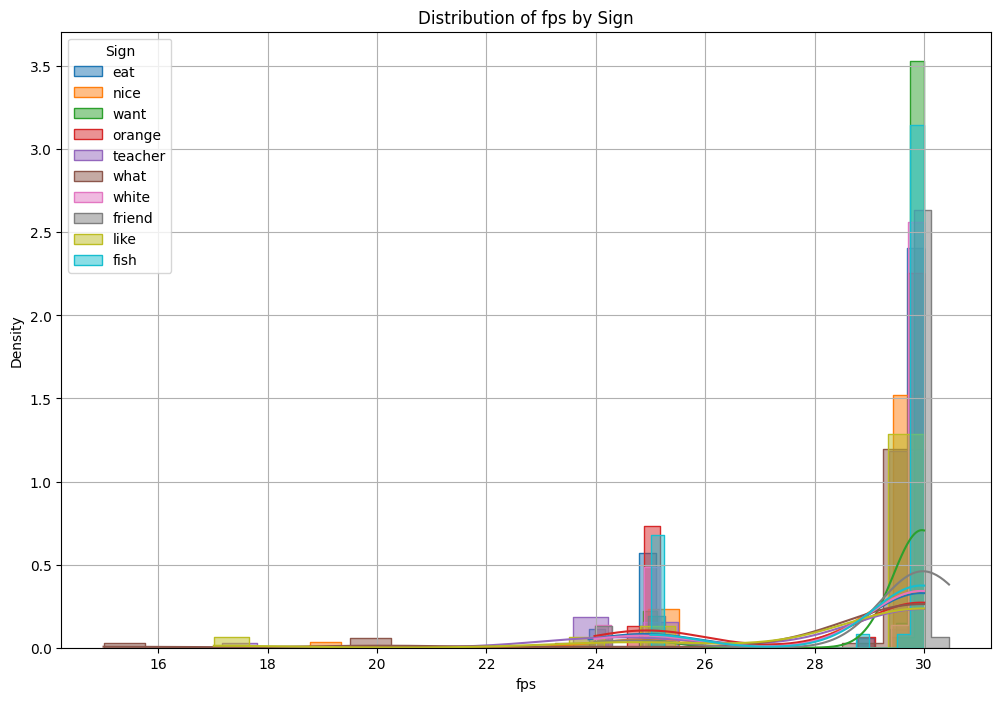

In [34]:
plt.figure(1, figsize=(12, 8))
for sign in top_10_signs.clean_text.to_list():
    plot_distribution(df, sign, 'fps')

plt.title('Distribution of fps by Sign')
plt.xlabel('fps')
plt.ylabel('Density')
plt.legend(title='Sign')
plt.grid()
plt.show()

In [ ]:
from torch.utils.data import Dataset
import cv2
import numpy as np
import torch
import os

class MSASLVideoDataset(Dataset):
    def __init__(self, video_paths, labels, num_frames=32, img_size=224, transforms=None):
        self.video_paths = video_paths
        self.labels = labels
        self.num_frames = num_frames
        self.img_size = img_size
        self.transforms = transforms

    def __len__(self):
        return len(self.video_paths)

    def __getitem__(self, idx):
        video_path = self.video_paths[idx]
        label = self.labels[idx]

        frames = self.load_video(video_path)
        if self.transforms:
            frames = self.transforms(frames)

        return frames, label

    def load_video(self, path):
        cap = cv2.VideoCapture(path)
        frames = []

        while True:
            ret, frame = cap.read()
            if not ret:
                break
            frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
            frame = cv2.resize(frame, (self.img_size, self.img_size))
            frames.append(frame)

        cap.release()

        frames = np.array(frames)

        # Uniformly sample self.num_frames frames
        total_frames = frames.shape[0]
        if total_frames >= self.num_frames:
            idxs = np.linspace(0, total_frames-1, self.num_frames).astype(int)
            frames = frames[idxs]
        else:
            # pad by repeating last frame
            pad_len = self.num_frames - total_frames
            pad_frames = np.repeat(frames[-1:], pad_len, axis=0)
            frames = np.concatenate((frames, pad_frames), axis=0)

        frames = frames.transpose(0, 3, 1, 2)  # (Frames, Channels, Height, Width)
        frames = torch.from_numpy(frames).float() / 255.0  # normalize 0-1
        return frames
